# Tutorial 1

¡Bienvenidos! En estas libretas iremos viendo como realizar un análisis de datos con python.

## Tema 1: Exploración inicial del arreglo de datos

Comenzaremos utilizando una base de datos inventada, aleatoria.


### Importación de paquetes necesarios (no modificar código)
Para ejecutar las celdas hay que dar click en el botón de "play" en la esquina superior izquierda de la celda

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats


Aquí definimos 3 librerías que utlizaremos en este tutorial:
- `pandas`: Es una especie de Excel, nos permite hacer magia con datos tabulados (en tabla). La usaremos para definir y explorar un arreglo de datos.
- `numpy`: Es una librería para manejar números, solo la usaremos para nuestros números aleatorios.
- `scipy.stats`: stats es un módulo dentro del paquéte de "scipy" (Scientific Python), contine muchas muchas herramientas para el análisis de datos, aquí solo la usaremos para definir un par de variables aleatorias.


### Definir la semilla del RNG (Random Number Generator)

In [2]:
seed = 42
np.random.seed(seed)

La semilla es un número que definira los números aleatorios que se generen, esto ayuda a la reproducibilidad de nuestros datos.


En lugar de 42, utiliza tu número favorito.


### Definir nuestro arreglo de datos

In [3]:
sample_size = 100
df = pd.DataFrame({
    'a': stats.bernoulli.rvs(0.3, size=sample_size),
    'b': stats.norm.rvs(size=sample_size),
    'c': stats.norm.rvs(size=sample_size),
})

In [4]:
df

,a,b,c
0,0,0.087047,0.013002
1,1,-0.299007,1.453534
2,1,0.091761,-0.264657
3,0,-1.987569,2.720169
4,0,-0.219672,0.625667
...,...,...,...
95,0,-0.815810,-1.435862
96,0,-0.077102,1.163164
97,0,0.341152,0.010233
98,0,0.276691,-0.981509


Hemos definido dos variables.

- `sample_size` es un número entero (int), y define el número de datos que va a tener nuestro areglo de datos. Es el tamaño muestral.
- `df` es un arreglo de datos (DataFrame) y contiene 3 variables aleatorias, una de ellas `a` es un variable dicotómica (ceros y unos), definida con una **distribución bernoulli** con una probabilidad de 0.3. Las otras dos, `b` y `c` son dos variables aleatorias tomadas de la **distribución z**, es decir: ${a,b}\sim N(\mu=0,\sigma=1)$.



### Análisis exploratorio inicial
El objeto del arreglo de datos (el DataFrame), tiene varios métodos y atributos muy útiles que exploraremos a continuación.

### Cabeza y Cola

Nuestro arreglo de datos `df` tiene varios métodos muy útiles para darnos cuenta de lo que contiene.
- `df.head` es un método que muestra las primeras n filas de nuestro arreglo, donde n es un argumento numérico que tiene el valor 5 por defecto.
- `df.tail` es un método idéntico a `df.head` pero muestra las últimas n filas.

In [9]:
df.head(2)

,a,b,c
0,0,0.087047,0.013002
1,1,-0.299007,1.453534


In [ ]:
df.tail(2)

,a,b,c
98,0,-0.985726,1.167782
99,1,0.504047,0.254421


Intenta cambiar el número de filas mostradas.

¿Qué crees que pase si no pones ningún número (`df.head()`)?



#### Analizando el resultado
Los métodos nos muestran el contenido del arreglo de las primeras o últimas filas solicitadas, pero podemos observar más información.
La primera columna mostrada corresponde al **índice** (`index`), podemos ver el contenido al examinar ese atributo.

> `df.index`, sin paréntesis, porque no es un método sino un atributo


In [ ]:
df.index

RangeIndex(start=0, stop=100, step=1)

La primera fila del arreglo, son los rótulos de las columnas, en este caso a, b y c. Podemos examinarlas con `df.columns`

In [10]:
df.columns

Index(['a', 'b', 'c'], dtype='object')



```
# Esto tiene formato de código
```

### info y shape
Ya sabemos más o menos qué tipo de datos se encuentran en nuestro arreglo, pero podemos obtener más información con estos métodos:
- `df.info` nos da información general del arreglo, incluyendo cuántas filas, columnas y el tipo de datos.
- `df.shape` nos dice cuántas filas y columnas tiene nuestro arreglo, en ese orden.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       100 non-null    int64  
 1   b       100 non-null    float64
 2   c       100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Como se puede ver, tenemos 3 columnas, 100 entradas, numeradas del 0 a la 99.
Las tres columnas son a, b y c, a es tipo `int64`, números enteros y, b y c son `float64`, es decir, números continuos (con punto decimal).

También nos dice que cada columna tiene 100 datos "non-null", es decir que no son `NaN`, `np.nan` o "Not a number"; como llamamos a los datos vacíos, que no conocemos.



In [ ]:
df.shape

(100, 3)

Shape nos dice primero el número de filas (cada fila podría ser un paciente o sujeto de estudio) y el segundo número es el número de columnas.


### Descripción
El método `df.describe` nos da información descriptiva de nuestro arreglo de datos. Como es un método se "llama" con paréntesis:

In [17]:
df.describe()

,a,b,c
count,100.000000,100.000000,100.000000
mean,0.300000,-0.001080,0.036874
std,0.460566,0.912929,1.097363
min,0.000000,-1.987569,-3.241267
25%,0.000000,-0.705128,-0.740981
50%,0.000000,0.077805,0.061244
75%,1.000000,0.483692,0.681263
max,1.000000,2.463242,3.852731


Por defecto `describe` selecciona solo los datos numéricos y nos da la siguiente información (filas):
- **count**: El número de datos sin `NaN`.
- **mean**: La media aritmética.
- **std**: Desviación estándar (para una muestra)
- **25,50,75%**: Percentiles 25 y 75 y mediana (50).
- **min, max**: Valores mínimos y máximos del arreglo.

### Cuenta de valores únicos
Para variables discretas de intervalo corto y para variables cualitativas, puede ser conveniente obtener la cuenta de valores únicos. Para nuestra variable `a` podemos obtenerlo por medio del arreglo de datos.





#### Acceder a la variable
Para acceder a una variable dentro de nuestro arreglo de datos, hay dos formas:
- `df['a']`: Utilizamos corchetes el identificador de la columna de interés. Como nos interesa "a" que es un string, lo pasamos como tal.
  - Ojo, si la columna es numércia, por ejemplo si el título es **0**, se debe pasar ese valor así: `df[0]`
- `df.a`: Cuando el nombre de la variable es válido en python, no se necesitan los corchetes., pero a veces puede ser confuso.

|nombre de variable|punto|corchetes|
|------------------|-----|---------|
|"a"|`df.a` __**(ok)**__ | `df["a"]` __**(ok)**__|
|"Diabetes Mellitus"| `df.Diabetes Mellitus` __**(error)**__|`df["Diabetes Mellitus"]` __**(ok)**__|


In [16]:
df['a']

,a
0,0
1,1
2,1
3,0
4,0
...,...
95,0
96,0
97,0
98,0


#### Value_counts

In [ ]:
df['a'].value_counts()

,count
a,
0,62
1,38


`df['a'].value_counts()` nos dice el número de categorías únicas, aquí 0 y 1 y cuántos datos tiene cada una, con la semilla 42, 0 tiene 62 y 1 tiene 38, lo cuál tiene sentido porque definimos a esa variable como ensayos bernoulli con probabilidad del 30%, ¿cuál es la cuenta en el tuyo?.

## Ejercicio 1
Juega con el código de la libreta, pon tus valores, cambia los nombres y explora con diferentes combinaciones.

## Tema 2: Cargar datos desde excel
Generalmente los datos tabulados y colectan en bases de datos, uno de los formatos más utilizados es excel.

### Primer paso: hacer que el excel esté disponible en colab.
En el menú vertical del lado izquierdo hay un ícono de "folder" al seleccionarlo se abrirán los archivos disponibles en nuestro código.

Simplemente hay que arrastrar el excel a ese menú.

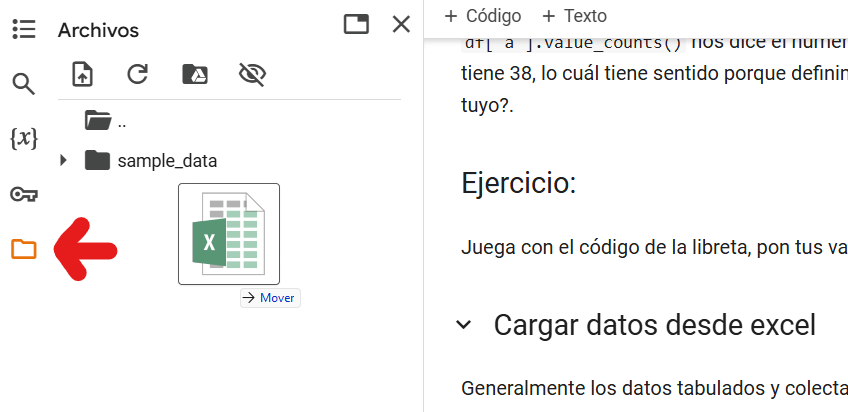




### Segundo paso: copiar ruta de acceso
Una vez que la base esté disponible, hay que dar click derecho y copiar la ruta de acceso:

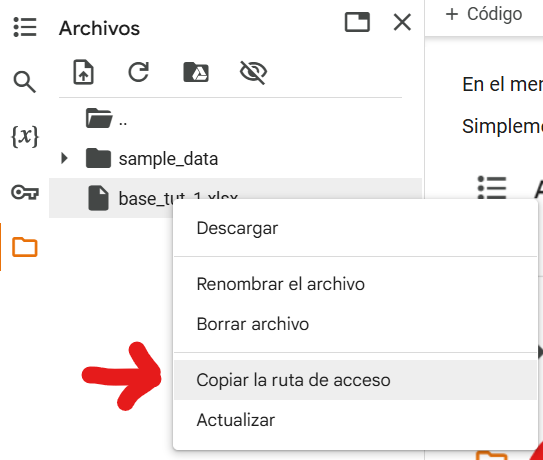

### Tercer paso: cargar los datos

Para cargar los datos, hacemos una variable `ruta` que contenga la ruta de acceso que copiamos y usamos pandas para leer los datos


In [ ]:
ruta = '/content/base_tut_1.xlsx'
df = pd.read_excel(ruta)
df.head()

,id,edad,sexo,peso,talla,TAS,TAD,HAS,DM2
0,1,28.0,F,113.5,1.54,142.0,79.0,NO,SI
1,2,46.0,M,122.5,1.76,117.0,74.0,SI,NO
2,3,54.0,F,120.0,1.50,140.0,70.0,SI,SI
3,4,38.0,F,102.0,1.60,110.0,70.0,NO,NO
4,5,40.0,F,118.0,1.78,114.0,80.0,NO,SI


### Conclusión
Con esto hemos redefinido df como un arreglo de datos del mundo real disponible en la variable `df`


## Ejercicio 2
Utiliza los métodos de la sección una para conocer el nuevo arreglo de datos y contesta las siguientes preguntas:

- [ ] ¿Cuántos sujetos de estudio tenemos?  
- [ ] ¿Cuántos datos faltan en la variable Sexo?
- [ ] ¿Cuál es la media de peso y de talla?
- [ ] ¿Cuál es número de pacientes que tienen diabetes?

In [ ]:
# Escribe aquí tu código

